In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medium-articles/medium_articles.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# load dataset

In [7]:
data_dir = '/kaggle/input/medium-articles'
data_file = 'medium_articles.csv'
to_file = os.path.join(data_dir, data_file)
df = pd.read_csv(to_file)

# **understanding data**

In [8]:
df.head(10)

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."
5,"Mentally, Young Adults Are Suffering Most From...","Mentally, Young Adults Are Suffering Most From...",https://medium.com/the-partnered-pen/mentally-...,['Ryan Fan'],2020-11-19 15:27:36.001000+00:00,"['Society', 'Mental Health', 'Health', 'Nonfic..."
6,How to Turn Your Popular Blog Series Into a Be...,How to Turn Your Popular Blog Series Into a Be...,https://frankmckinley.medium.com/want-to-turn-...,['Frank Mckinley'],2020-01-28 03:36:58.566000+00:00,"['Books', 'Entrepreneurship', 'Writing', 'Mark..."
7,Dr Faisal Dar — Pioneer of Liver Transplantati...,Dr Faisal Dar — Pioneer of Liver Transplantati...,https://medium.com/storyfest/dr-faisal-dar-pio...,['Fatima Arif'],2019-02-28 06:01:04.914000+00:00,"['People', 'Storyfest', 'Health', 'Pakistan', ..."
8,Sunlight — The Natural Supplement For Our Ment...,Sunlight — The Natural Supplement For Our Ment...,https://medium.com/wholistique/sunlight-the-na...,['Jerren Gan'],2020-12-16 10:47:37.171000+00:00,"['Self Improvement', 'Mental Health', 'Health'..."
9,Occam’s dice,Occam’s dice\n\nDistrusting biological metapho...,https://medium.com/the-spike/occams-dice-258aa...,['Kelly Clancy'],2018-08-22 14:55:56.262000+00:00,"['Machine Learning', 'Science', 'Neuroscience'..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192368 entries, 0 to 192367
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      192363 non-null  object
 1   text       192368 non-null  object
 2   url        192368 non-null  object
 3   authors    192368 non-null  object
 4   timestamp  192366 non-null  object
 5   tags       192368 non-null  object
dtypes: object(6)
memory usage: 8.8+ MB


In [10]:
df.drop(columns = ["url", "authors", "timestamp"], inplace = True)

In [11]:
df.drop_duplicates(keep = "first", inplace = True)
df.reset_index(inplace = True, drop = True)

In [12]:
df = df.head(10000)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9999 non-null   object
 1   text    10000 non-null  object
 2   tags    10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


# handeling missing data

In [14]:
max_non_null_val = df["text"].count()
print("Percentage of missing values in each column:\n")
missing_percent = []
for col in df.columns:
  missing_percent.append(df[col].isnull().sum()/max_non_null_val*100)
  print(f"{col} : {df[col].isnull().sum()/max_non_null_val*100}%")

Percentage of missing values in each column:

title : 0.01%
text : 0.0%
tags : 0.0%


In [15]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9999 non-null   object
 1   text    9999 non-null   object
 2   tags    9999 non-null   object
dtypes: object(3)
memory usage: 234.5+ KB


#Loading the Spacy model


In [16]:
!pip install spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 28.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [17]:
import spacy
nlp = spacy.load("en_core_web_md")

##preprocessing the data

In [18]:
df["text"] = df["title"] + " " + df["text"]

In [19]:
corpus = []
for i in range(0, df["text"].count()):
    review = df['text'][i]
    doc = nlp(review)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    review = ' '.join(tokens)
    corpus.append(review)

In [20]:
indexes = []

for index, sentence in enumerate(corpus):
    if sentence.strip() == "":
        print(index)
        print(df["text"][index])
        indexes.append(index)

df.drop(index=indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
for i in indexes:
  corpus.pop(i)

# Creating bag of words model

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus)

In [24]:
y = df["tags"]

#Making an LDA model

In [39]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 10, random_state = 1)
X_topics = lda.fit_transform(X)

##visualizing the models created

In [34]:
!pip install pyLDAvis

ERROR: Could not find a version that satisfies the requirement pyLDAvis.sklearn (from versions: none)
ERROR: No matching distribution found for pyLDAvis.sklearn


In [40]:
import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
panel = pyLDAvis.lda_model.prepare(lda, X, cv, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8      17.351896 -17.869350       1        1  16.363130
1      54.147289 -36.253826       2        1  16.215806
0      44.056362  57.361660       3        1  14.755333
7       3.996416 -56.400608       4        1  12.011517
6      -5.319032  54.593239       5        1  11.317809
3     -33.167900 -26.038157       6        1   8.266553
9      67.820152   8.543405       7        1   6.639444
2     -10.462422  10.345096       8        1   5.678056
5     -47.788727  25.020372       9        1   5.173491
4      27.918844  20.324955      10        1   3.578861, topic_info=              Term          Freq         Total Category  logprob  loglift
16234        datum  21271.000000  21271.000000  Default  30.0000  30.0000
3063           app   7019.000000   7019.000000  Default  29.0000  29.0000
43861        model  10639.000000  10639.000000  Default  28.0000  28.0000
73294         user  10323.000000  10323.000000  Default  27.0000  27.0000
17459       design   9347.000000   9347.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
3149   application    680.567816   5384.850702  Topic10  -5.4344   1.2617
25906     function    697.478959   7285.896235  Topic10  -5.4098   0.9839
39081         like    788.428032  23433.232528  Topic10  -5.2872  -0.0617
71202         type    619.893586   6126.350630  Topic10  -5.5277   1.0393
39815         look    625.665825  11862.986438  Topic10  -5.5185   0.3878

[963 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
427        2  0.016960  accuracy
427        3  0.002423  accuracy
427        4  0.001615  accuracy
427        5  0.897273  accuracy
427        6  0.016153  accuracy
...      ...       ...       ...
77275      7  0.042840      year
77275      8  0.098654      year
77275      9  0.061474      year
77275     10  0.005399      year
77404      8  0.979426       yod

[3761 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 1, 8, 7, 4, 10, 3, 6, 5])

In [41]:
n_top_words = 10
words = cv.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topic_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    topics.append(" ".join(topic_words))
    print(f"Topic {topic_idx}: {' '.join(topic_words)}")

Topic 0: life people feel time like know way thing think come
Topic 1: design work team product company need business ai time new
Topic 2: like apple year music sound car game time look go
Topic 3: year new country world people system government case public state
Topic 4: app component react use code user create add new android
Topic 5: day people time health think work study say like thing
Topic 6: datum model value image learning use machine dataset function number
Topic 7: code use create run datum file python need application function
Topic 8: write work time like story want book people know read
Topic 9: datum user customer business market marketing product search feature google


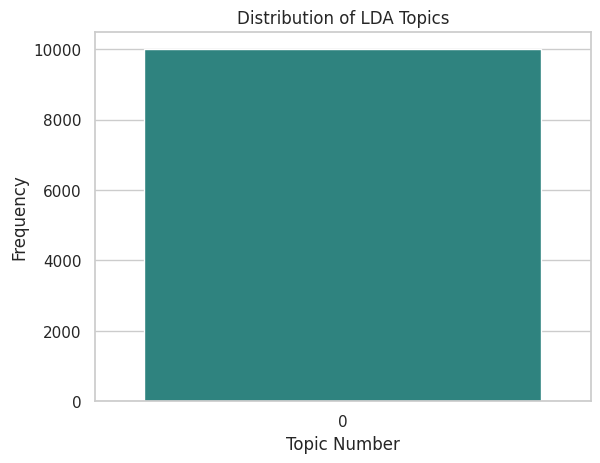

In [42]:
sns.set(style="whitegrid")

# Plotting the topics frequency
topics_frequency = np.argmax(X_topics, axis=1)
sns.countplot(topics_frequency, palette="viridis")
plt.title("Distribution of LDA Topics")
plt.xlabel("Topic Number")
plt.ylabel("Frequency")
plt.show()